# **Exercise 04: histogram**

Prepare the project:

In [1]:
%pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Import allowed modules:

In [3]:
import sqlite3

import pandas as pd
import matplotlib.pyplot as plt

Import allowed entities:

In [4]:
from pandas import DataFrame
from sqlite3 import Connection

Create a dictionary for connection to the database:

In [5]:
conn_params: dict = {"db_file": "checking_logs.sqlite", "db_file_path": "../../data/", }

Make a connection to the [database](https://drive.google.com/open?id=1zQ8AR2Ry3ajzB3UZO1Sfk3xtDJlzQF2M):

In [6]:
conn: Connection = sqlite3.connect(conn_params["db_file_path"] + conn_params["db_file"], )

Check connection:

In [7]:
conn.cursor().execute("SELECT 123;", );

## Analyze only the users and not the admins:

Create a query:

In [8]:
sql_q: str = """
             SELECT
                 checker.timestamp AS datetime
             FROM
                 checker
             WHERE
                 checker.uid LIKE 'user_%';
             """

Run a query:

In [9]:
df: DataFrame = pd.io.sql.read_sql(
    sql_q,
    conn,
    parse_dates=["datetime", ],
)

Chech result:

In [10]:
df.head()

,datetime
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370


Add necessary *Pandas* dataframe columns:

In [11]:
df["hour"] = df["datetime"].dt.hour
df["day_type"] = df["datetime"].dt.dayofweek.apply(lambda day: "weekend" if day >= 5 else "working_day", )

Check them:

In [12]:
df.head()

,datetime,hour,day_type
0,2020-04-17 05:19:02.744528,5,working_day
1,2020-04-17 05:22:35.249331,5,working_day
2,2020-04-17 05:22:45.549397,5,working_day
3,2020-04-17 05:34:14.691200,5,working_day
4,2020-04-17 05:34:24.422370,5,working_day


## Create two lists of values for the histogram input:

In [13]:
weekends: list = list(df[df["day_type"] == "weekend"]["hour"], )
working_days: list = list(df[df["day_type"] == "working_day"]["hour"], )

Check them:

In [14]:
working_days[: 10]

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

In [15]:
weekends[: 10]

[7, 13, 13, 13, 13, 13, 14, 14, 14, 15]

## The `figsize=` is still the same, you can choose the `fontsize=` as well as the color palette.

## Use a level of transparency for the histogram in front equal to `0.7`:

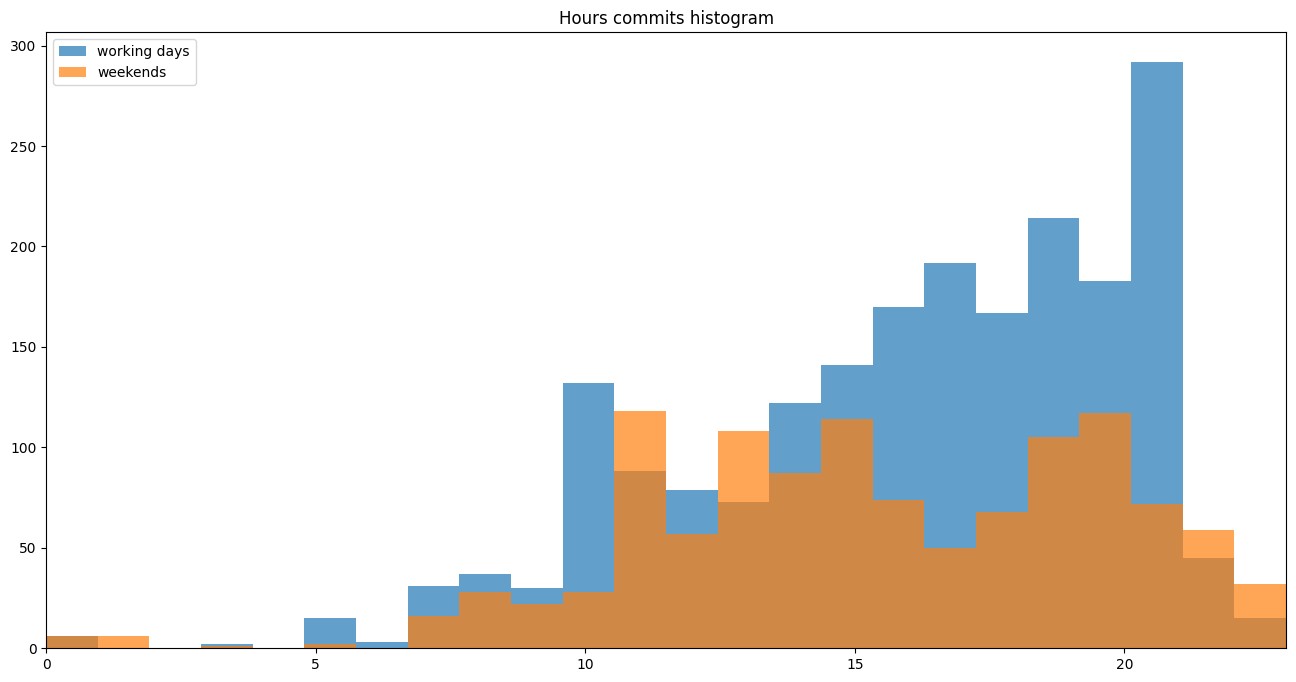

In [16]:

plt.figure(figsize=(16, 8, ), )
plt.hist(
    working_days,
    bins=24,
    alpha=0.7,
)
plt.hist(
    weekends,
    bins=24,
    alpha=0.7,
)
plt.xlim(0, 23, )
plt.title("Hours commits histogram", )
plt.legend(["working days", "weekends", ], loc="upper left", );

## At the end of *Jupyter Notebook*, create a markdown cell and insert the question: `Are there hours when the total number of commits was higher on weekends than on working days?`

Add new column `date` to the *Pandas* dataframe:

In [17]:
df["date"] = df["datetime"].dt.date

Check it:

In [18]:
df.head()

,datetime,hour,day_type,date
0,2020-04-17 05:19:02.744528,5,working_day,2020-04-17
1,2020-04-17 05:22:35.249331,5,working_day,2020-04-17
2,2020-04-17 05:22:45.549397,5,working_day,2020-04-17
3,2020-04-17 05:34:14.691200,5,working_day,2020-04-17
4,2020-04-17 05:34:24.422370,5,working_day,2020-04-17


Drop useless *Pandas* dataframe column `datetime`:

In [19]:
df.drop(columns=["datetime", ], inplace=True, )

Check updated *Pandas* dataframe:

In [20]:
df.head()

,hour,day_type,date
0,5,working_day,2020-04-17
1,5,working_day,2020-04-17
2,5,working_day,2020-04-17
3,5,working_day,2020-04-17
4,5,working_day,2020-04-17


Group by `hour` and `day_type` columns *Pandas* dataframe:

In [21]:
df = df.groupby(by=["hour", "day_type", ], ).size().reset_index(name="commits", )

Check it:

In [22]:
df.head()

,hour,day_type,commits
0,0,weekend,6
1,0,working_day,6
2,1,weekend,6
3,3,weekend,1
4,3,working_day,2


Split *Pandas* dataframe on: `weekends`, `working_days`:

In [23]:
weekends: DataFrame = df[df["day_type"] == "weekend"]
working_days: DataFrame = df[df["day_type"] == "working_day"]

Check them:

In [24]:
weekends.head()

,hour,day_type,commits
0,0,weekend,6
2,1,weekend,6
3,3,weekend,1
5,5,weekend,2
8,7,weekend,16


In [25]:
working_days.head()

,hour,day_type,commits
1,0,working_day,6
4,3,working_day,2
6,5,working_day,15
7,6,working_day,3
9,7,working_day,31


Add hours without commits in them and drop columns `day_type`:

In [26]:
weekends = pd.merge(
    DataFrame({"hour": range(24, ), }, ),
    weekends,
    on="hour",
    how="left",
).drop(columns=["day_type", ], )

In [27]:
working_days = pd.merge(
    DataFrame({"hour": range(24, ), }, ),
    working_days,
    on="hour",
    how="left",
).drop(columns=["day_type", ], )

Fill `NaN` values by zero:

In [28]:
weekends.fillna(0, inplace=True, )
working_days.fillna(0, inplace=True, )

Check them:

In [29]:
weekends.head()

,hour,commits
0,0,6.0
1,1,6.0
2,2,0.0
3,3,1.0
4,4,0.0


In [30]:
working_days.head()

,hour,commits
0,0,6.0
1,1,0.0
2,2,0.0
3,3,2.0
4,4,0.0


Merge them back to the one *Pandas* dataframe:

In [31]:
df = pd.merge(
    weekends,
    working_days,
    on="hour",
    how="inner",
).rename(columns={"commits_x": "weekends", "commits_y": "working_days", }, )

Check result *Pandas* dataframe:

In [32]:
df.head()

,hour,weekends,working_days
0,0,6.0,6.0
1,1,6.0,0.0
2,2,0.0,0.0
3,3,1.0,2.0
4,4,0.0,0.0


Calculate difference between number of weekends commits and working days commits for every hour:

In [33]:
df["diff"] = df["weekends"] - df["working_days"]

Answer on the question:

In [34]:
print(f"Hours when the total number of commits was higher on weekends than on working days are: {df.sort_values(by=["diff", ], ascending=False, )["hour"].values[: 4]}.", )

Hours when the total number of commits was higher on weekends than on working days are: [13 11 23 22].


Close the connection to the database:

In [35]:
conn.close()